curses is not supported on this machine (please install/reinstall curses for an optimal experience)


 * Running on http://0.0.0.0:5000/ (Press CTRL+C to quit)


Content-Type: 
Host: localhost:5000
Token: kdjsdskacvbbc217vpewe
Accept-Encoding: gzip, deflate
Accept: */*
Content-Length: 1491312
User-Agent: python-requests/2.21.0
Connection: keep-alive


(478, 640) (478, 640)
loading pretrained model...
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
INFO:tensorflow:Restoring parameters from C:\Users\johnny\Desktop\emotion_detection\best_model\saved_model.bin


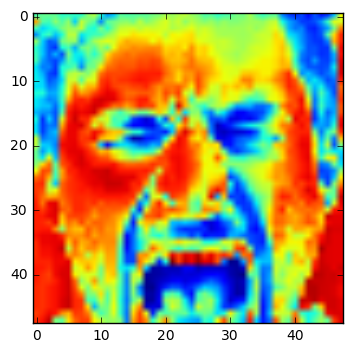

127.0.0.1 - - [22/Dec/2018 11:58:24] "POST / HTTP/1.1" 200 -


Prediction: Angry (confidence: 93.0%)
time: 0.1 sec


In [ ]:
from flask import Flask, render_template, request
from flask import jsonify
import io
import numpy as np
import json
import ast
import sys
import Emotion_detector ,traceback
import cv2
app = Flask(__name__)
@app.route('/', methods=[ 'POST'])
def upload():
    if request.method == 'POST' :
        try :
            print (request.headers)
            data = str(request.data.decode('utf-8'))
            data = json.loads(data)
            header = str(request.headers['Token'])
            if (header!="kdjsdskacvbbc217vpewe"):
                return jsonify({"error":"Invalid Token"})
            if data is None:
                return "Please enter valid data"
            
            else:
                print (cv2.imread("b.jpg", 0).shape , np.array(data["image1"]).shape)
                emotion, confidence=Emotion_detector.main(np.array(data["image1"],dtype='uint8'))
                return jsonify({"emotion":str(emotion) , "confidence":str(confidence)})
            
        except Exception as e:
            error = traceback.format_exc()
            return jsonify({"error":str(error)})

if __name__ == '__main__':
    app.run(debug=False,host='0.0.0.0') 